In [2]:
import pandas as pd
import numpy as np
sales = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


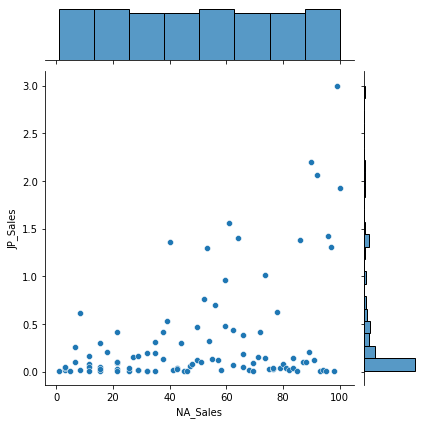

In [3]:
import seaborn as sns
s = sales[(sales.NA_Sales.notnull() & sales.JP_Sales.notnull())]
s = sales[((sales.NA_Sales > 0) & (sales.JP_Sales > 0))]
s = s.sample(100, random_state=0)
s = s.loc[s.NA_Sales.rank().sort_values().index]
sns.jointplot(s.NA_Sales.rank(), s.JP_Sales)

In [4]:
NA_sales_ranks = s.NA_Sales.rank().values[:, np.newaxis]
JP_sales = s.JP_Sales.values[:, np.newaxis]

In [5]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def predict(degree):
    poly = PolynomialFeatures(degree=degree)
    NA_sales_ranks_poly = poly.fit_transform(NA_sales_ranks)
    clf = LinearRegression()
    clf.fit(NA_sales_ranks_poly, JP_sales)
    JP_sale_predictions = clf.predict(NA_sales_ranks_poly)
    result = np.dstack((JP_sales.flatten(), JP_sale_predictions.flatten())).reshape((100, 2))
    return result

Text(0.5, 1.0, 'Regression with Degree 1')

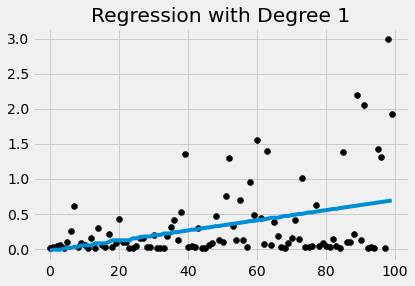

In [6]:
result = predict(1)
plt.plot(range(len(result[:, 1])), result[:, 1])
plt.scatter(range(len(result[:, 0])), result[:, 0], color='black')
plt.gca().set_title("Regression with Degree 1")

Text(0.5, 1.0, 'Regression with Degree 3')

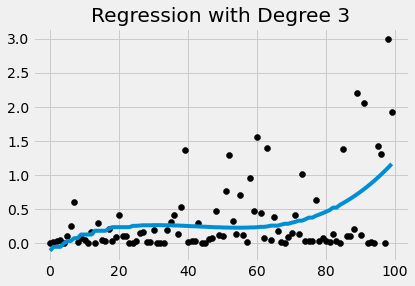

In [7]:
result = predict(3)
plt.plot(range(len(result[:, 1])), result[:, 1])
plt.scatter(range(len(result[:, 0])), result[:, 0], color='black')
plt.gca().set_title("Regression with Degree 3")

Text(0.5, 1.0, 'Regression with Degree 10')

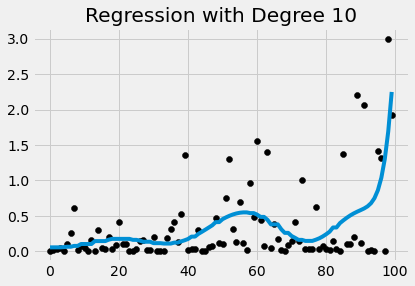

In [8]:
result = predict(10)
plt.plot(range(len(result[:, 1])), result[:, 1])
plt.scatter(range(len(result[:, 0])), result[:, 0], color='black')
plt.gca().set_title("Regression with Degree 10")


In [9]:
def get_model(degree):
    poly = PolynomialFeatures(degree=degree)
    NA_sales_ranks_poly = poly.fit_transform(NA_sales_ranks)
    clf = LinearRegression()
    clf.fit(NA_sales_ranks_poly, JP_sales)
    return clf

m1_coef = get_model(1).coef_
m3_coef = get_model(3).coef_
m10_coef = get_model(10).coef_

In [10]:
m1_coef

array([[0.       , 0.0072369]])

In [11]:
m3_coef

array([[ 0.00000000e+00,  3.13757975e-02, -7.73276037e-04,
         5.89804448e-06]])

In [12]:
m10_coef


array([[ 0.00000000e+00,  1.01805404e-07,  8.82342845e-08,
         1.25384461e-06,  1.01931593e-05, -1.05224698e-06,
         4.34963737e-08, -9.22361779e-10,  1.06238296e-11,
        -6.33094987e-14,  1.53150973e-16]])

In [13]:
from sklearn.linear_model import Ridge

def get_ridge_model(degree, alpha):
    poly = PolynomialFeatures(degree=degree)
    NA_sales_ranks_poly = poly.fit_transform(NA_sales_ranks)
    clf = Ridge(alpha=alpha)
    clf.fit(NA_sales_ranks_poly, JP_sales)
    return clf

def ridge_predict(degree, alpha):
    poly = PolynomialFeatures(degree=degree)
    NA_sales_ranks_poly = poly.fit_transform(NA_sales_ranks)
    clf = get_ridge_model(degree, alpha)
    JP_sale_predictions = clf.predict(NA_sales_ranks_poly)
    result = np.dstack((JP_sales.flatten(), JP_sale_predictions.flatten())).reshape((100, 2))
    return result

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.12512e-40): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Text(0.5, 1.0, 'degree=10, alpha=$10^1$')

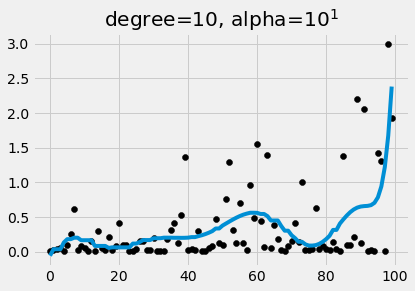

In [14]:
result = ridge_predict(10, 10)
plt.plot(range(len(result[:, 1])), result[:, 1])
plt.scatter(range(len(result[:, 0])), result[:, 0], color='black')
plt.gca().set_title("degree=10, alpha=$10^1$")

Text(0.5, 1.0, 'degree=10, alpha=$10^{25}$')

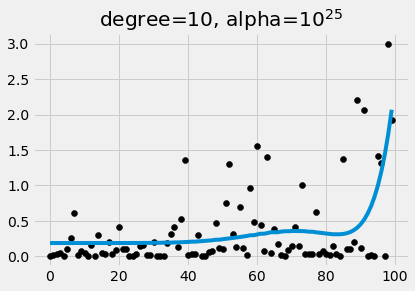

In [15]:
result = ridge_predict(10, 10**25)
plt.plot(range(len(result[:, 1])), result[:, 1])
plt.scatter(range(len(result[:, 0])), result[:, 0], color='black')
plt.gca().set_title("degree=10, alpha=$10^{25}$")

Text(0.5, 1.0, 'degree=10, alpha=$10^{40}$')

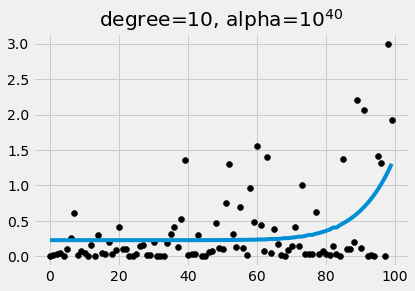

In [16]:
result = ridge_predict(10, 10**40)
plt.plot(range(len(result[:, 1])), result[:, 1])
plt.scatter(range(len(result[:, 0])), result[:, 0], color='black')
plt.gca().set_title("degree=10, alpha=$10^{40}$")


In [17]:
get_ridge_model(10, 10**40).coef_

array([[0.00000000e+00, 1.72581228e-38, 1.42366282e-36, 1.13565560e-34,
        9.84967256e-33, 9.30789443e-31, 9.30901635e-29, 9.57950283e-27,
        9.96214015e-25, 1.03722742e-22, 1.07673163e-20]])